# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

In [0]:
# this is a comment
print ('hello world')
print (4+3)

hello world
7


## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0
7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0
6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0
6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0
8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0,0
6,4,sep,tue,91,12

In [0]:
import pandas as pd
import numpy as np 

In [0]:
df_ff = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df_ff.head

<bound method NDFrame.head of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [0]:
# Yes, headers are showing up properly.
# Yes, they seem in order
# Yes, correct number of rows and columns
# No, UCI says no missing values
df_ff.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [0]:
# Confirmed no missing values above.
df_ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [0]:
df_ff.describe(exclude='number')

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

In [0]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [0]:
df_rw = pd.read_csv('winequality-red.csv', delimiter=';')
print(df_rw.shape)

(1599, 12)


In [0]:
df_rw.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [0]:
# Headers are showing up, but it is not a proper csv, it uses semi colons.
# Fixed by using dilimeter= ';'
# Order seems correct
# Correct number of columns, but less rows (due to there being a white wine csv as well)
# Says no missing values

In [0]:
df_rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
df_rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
df_rw.describe(exclude='number')

ValueError: ignored

In [0]:
# There are no non numeric values to describe

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
df_rw.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [0]:
df_ff.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [0]:
# I tried to add more than two, but only 'objects' worked.
pd.crosstab(df_ff['month'], df_ff['day'])

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

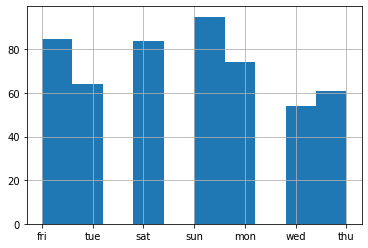

In [0]:
df_ff['day'].hist();

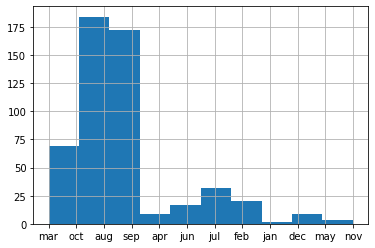

In [0]:
df_ff['month'].hist();

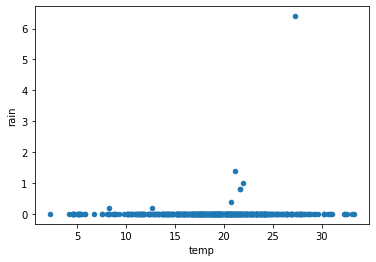

In [0]:
df_ff.plot.scatter('temp', 'rain');

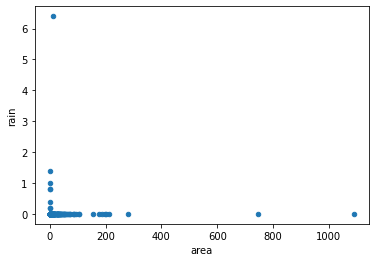

In [0]:
df_ff.plot.scatter('area', 'rain');

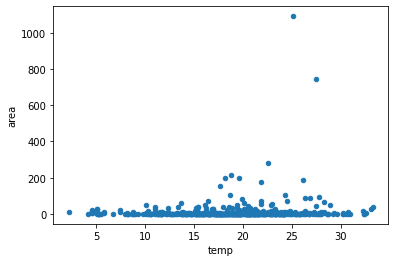

In [0]:
df_ff.plot.scatter('temp', 'area');

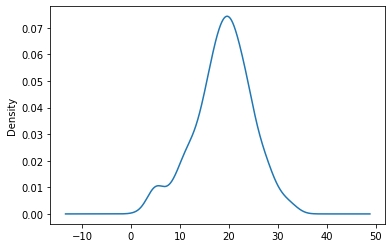

In [0]:
df_ff['temp'].plot.density();

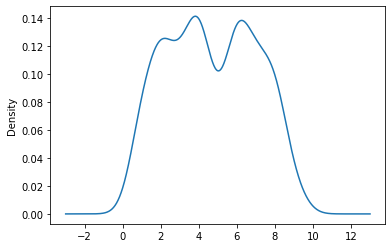

In [0]:
df_ff['X'].plot.density();

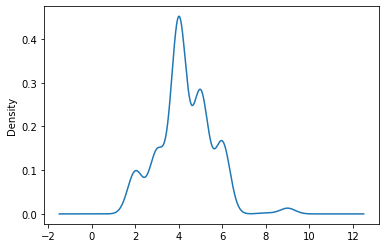

In [0]:
df_ff['Y'].plot.density();

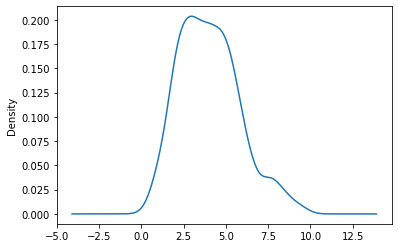

In [0]:
df_ff['wind'].plot.density();

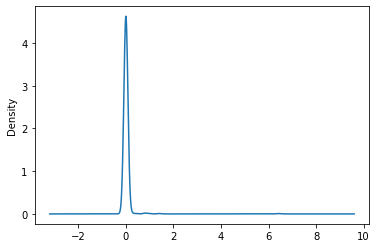

In [0]:
df_ff['rain'].plot.density();

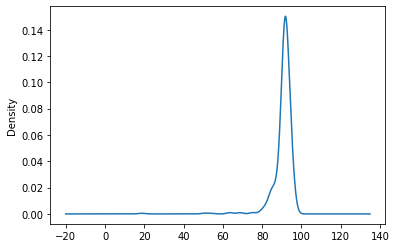

In [0]:
df_ff['FFMC'].plot.density();

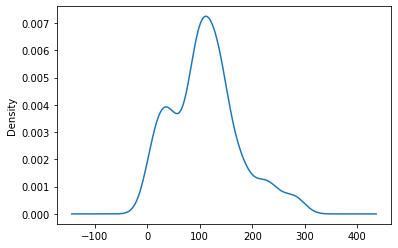

In [0]:
df_ff['DMC'].plot.density();

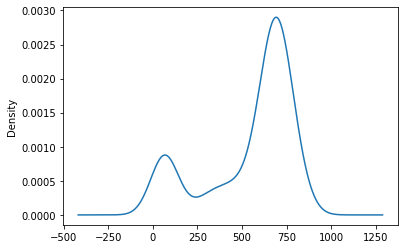

In [0]:
df_ff['DC'].plot.density();

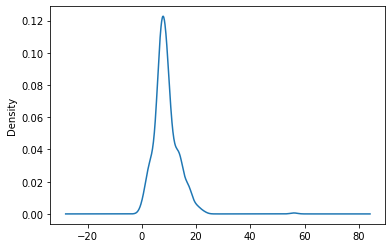

In [0]:
df_ff['ISI'].plot.density();

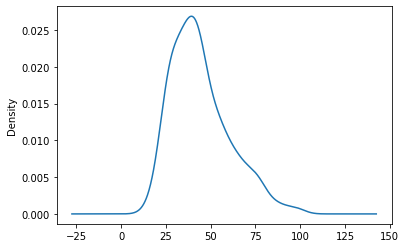

In [0]:
df_ff['RH'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
xtabs = pd.crosstab(df_ff['month'], df_ff['day'])

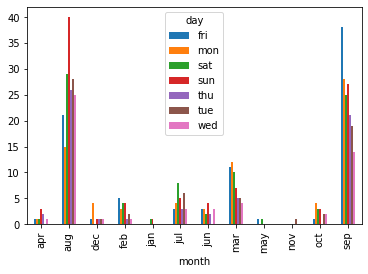

In [0]:
xtabs.plot(kind='bar')

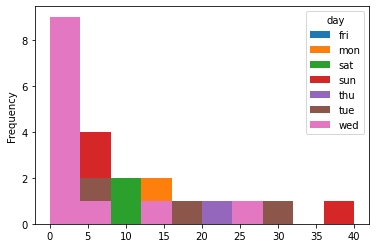

In [0]:
xtabs.plot(kind='hist')

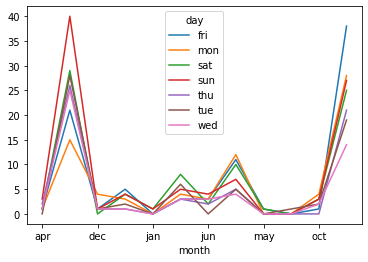

In [0]:
xtabs.plot(kind='line')

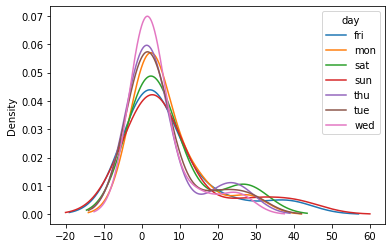

In [0]:
xtabs.plot(kind='density')

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [85]:
pip install seaborn

In [0]:
import seaborn as sb

In [90]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [91]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [0]:
# Potential column headers
# Attribute Information:
#   1. sepal length in cm
#   2. sepal width in cm
#   3. petal length in cm
#   4. petal width in cm
#   5. class: 
#      -- Iris Setosa
#      -- Iris Versicolour
#      -- Iris Virginica

In [92]:
from google.colab import files
files.upload()

Saving iris.data to iris.data


{'iris.data': b'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa

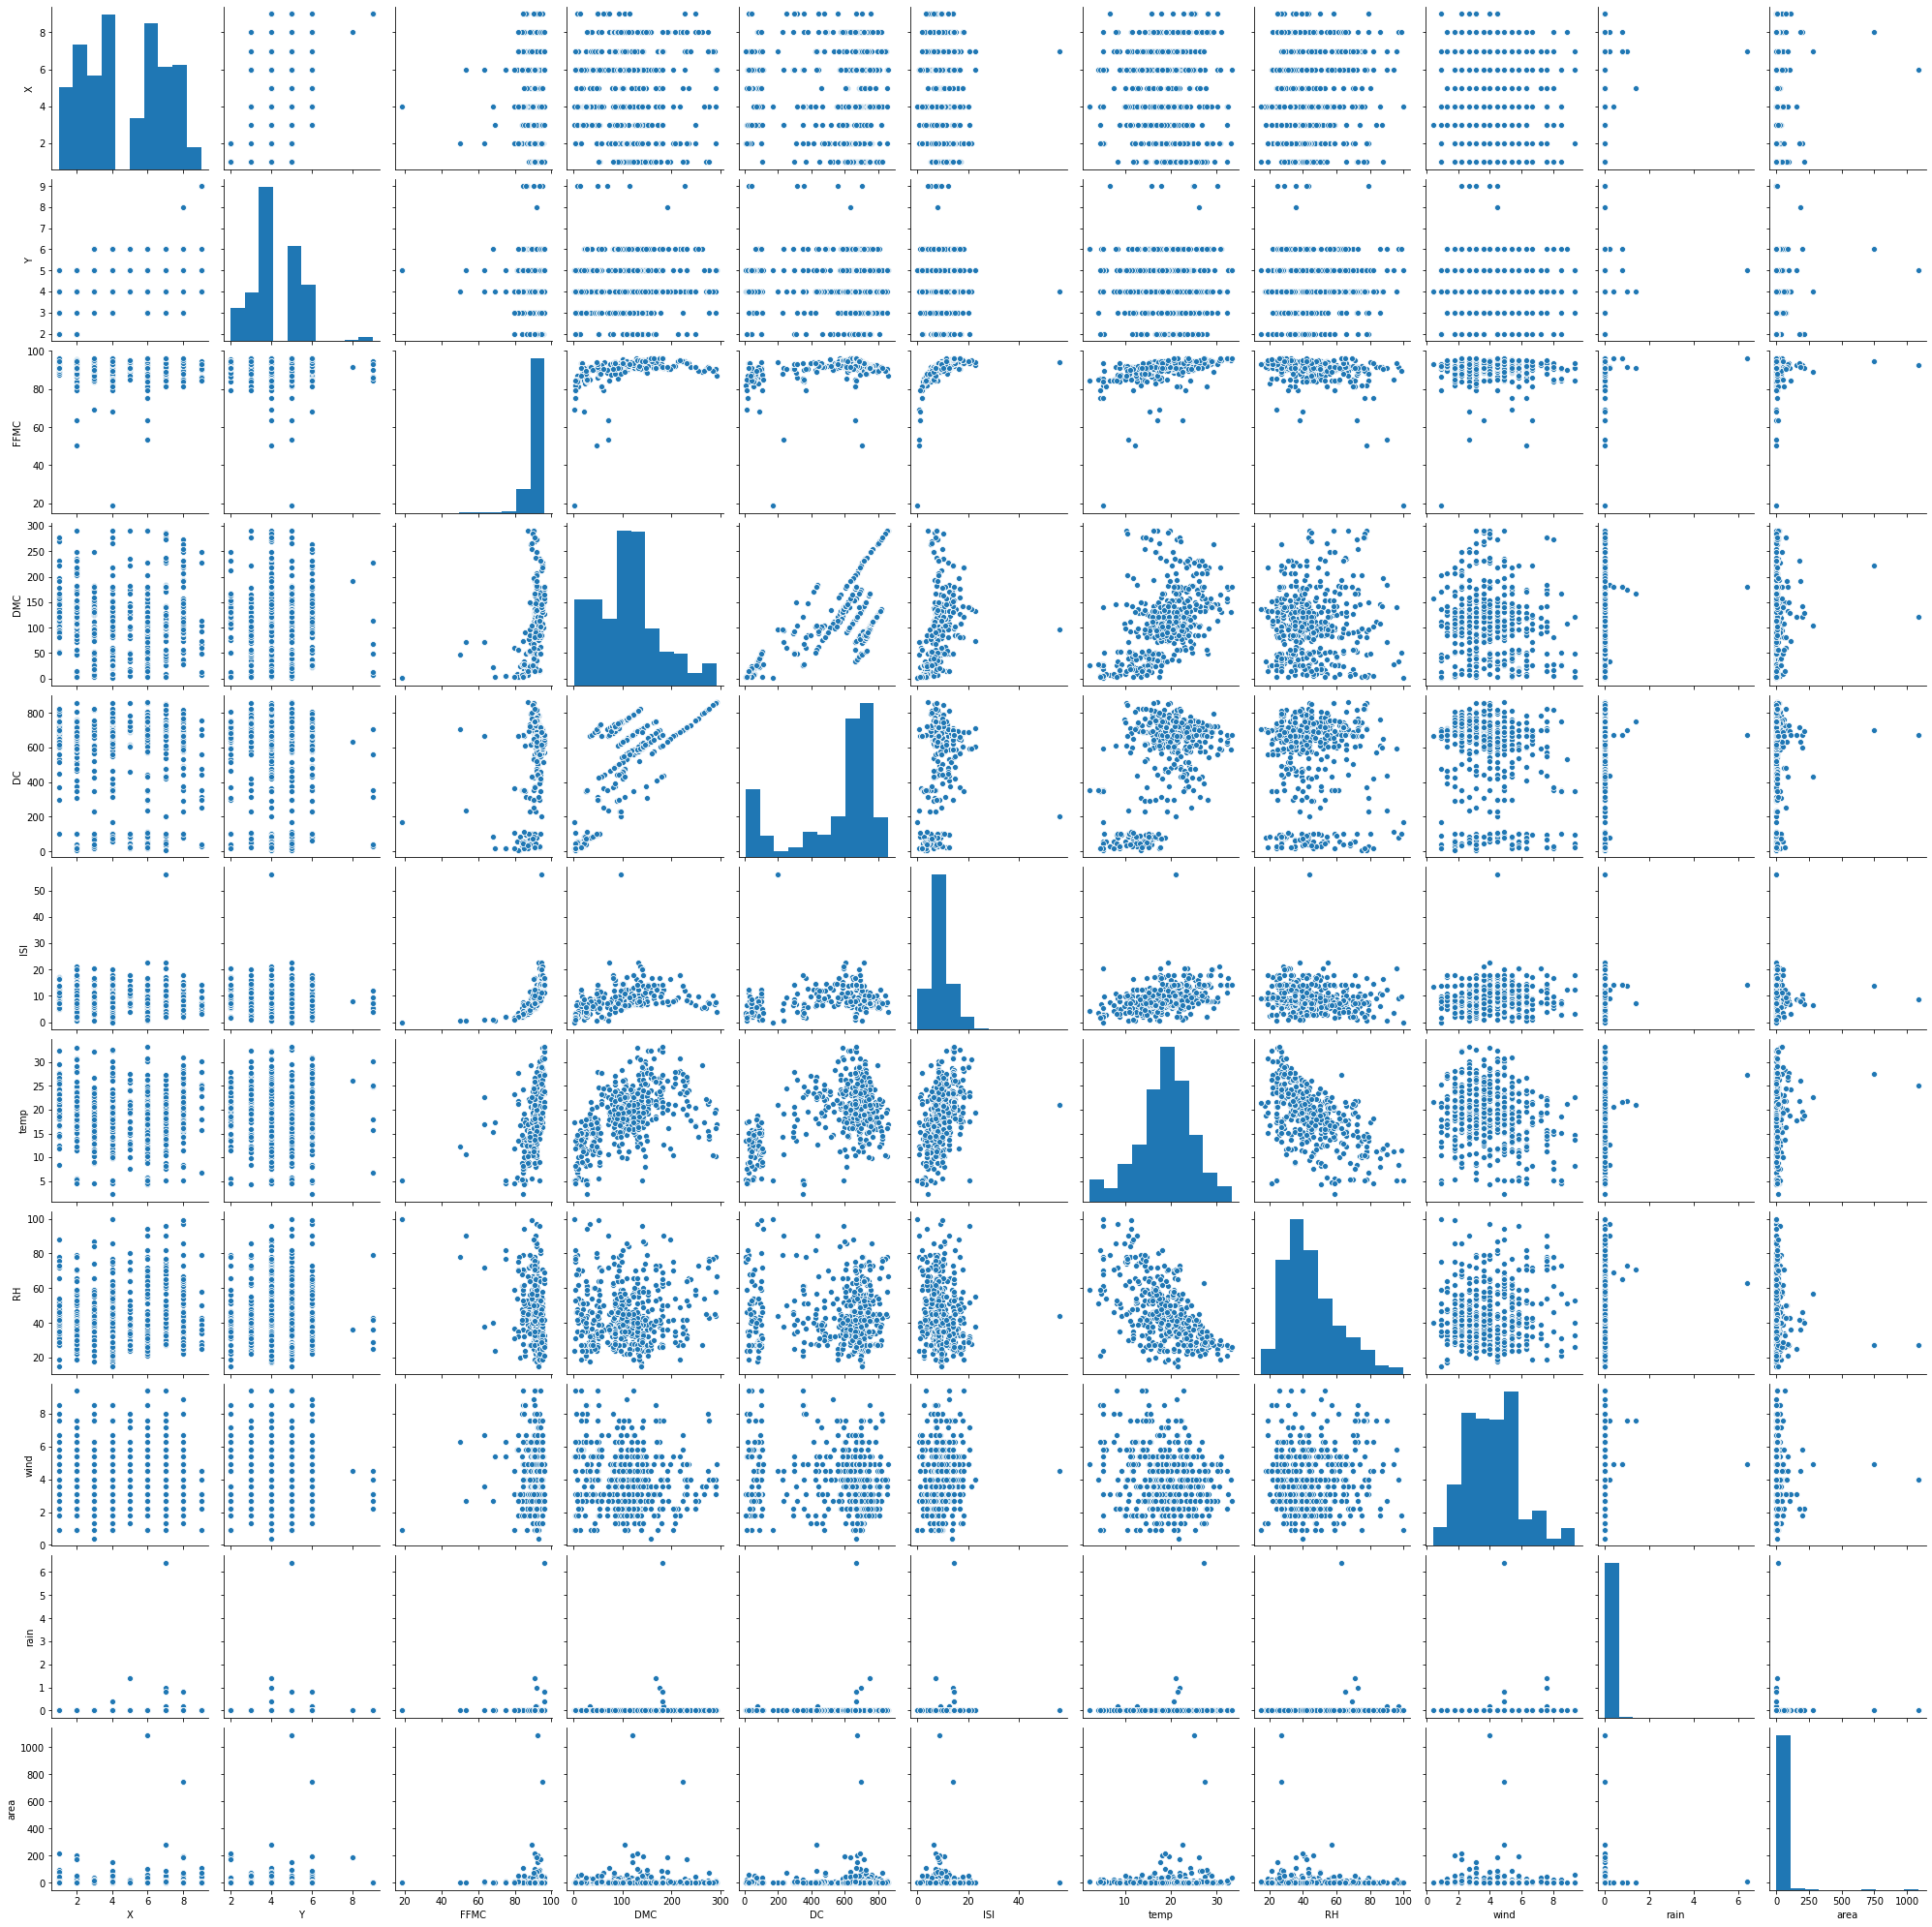

In [94]:
# Forrest fires
sb.pairplot(df_ff)

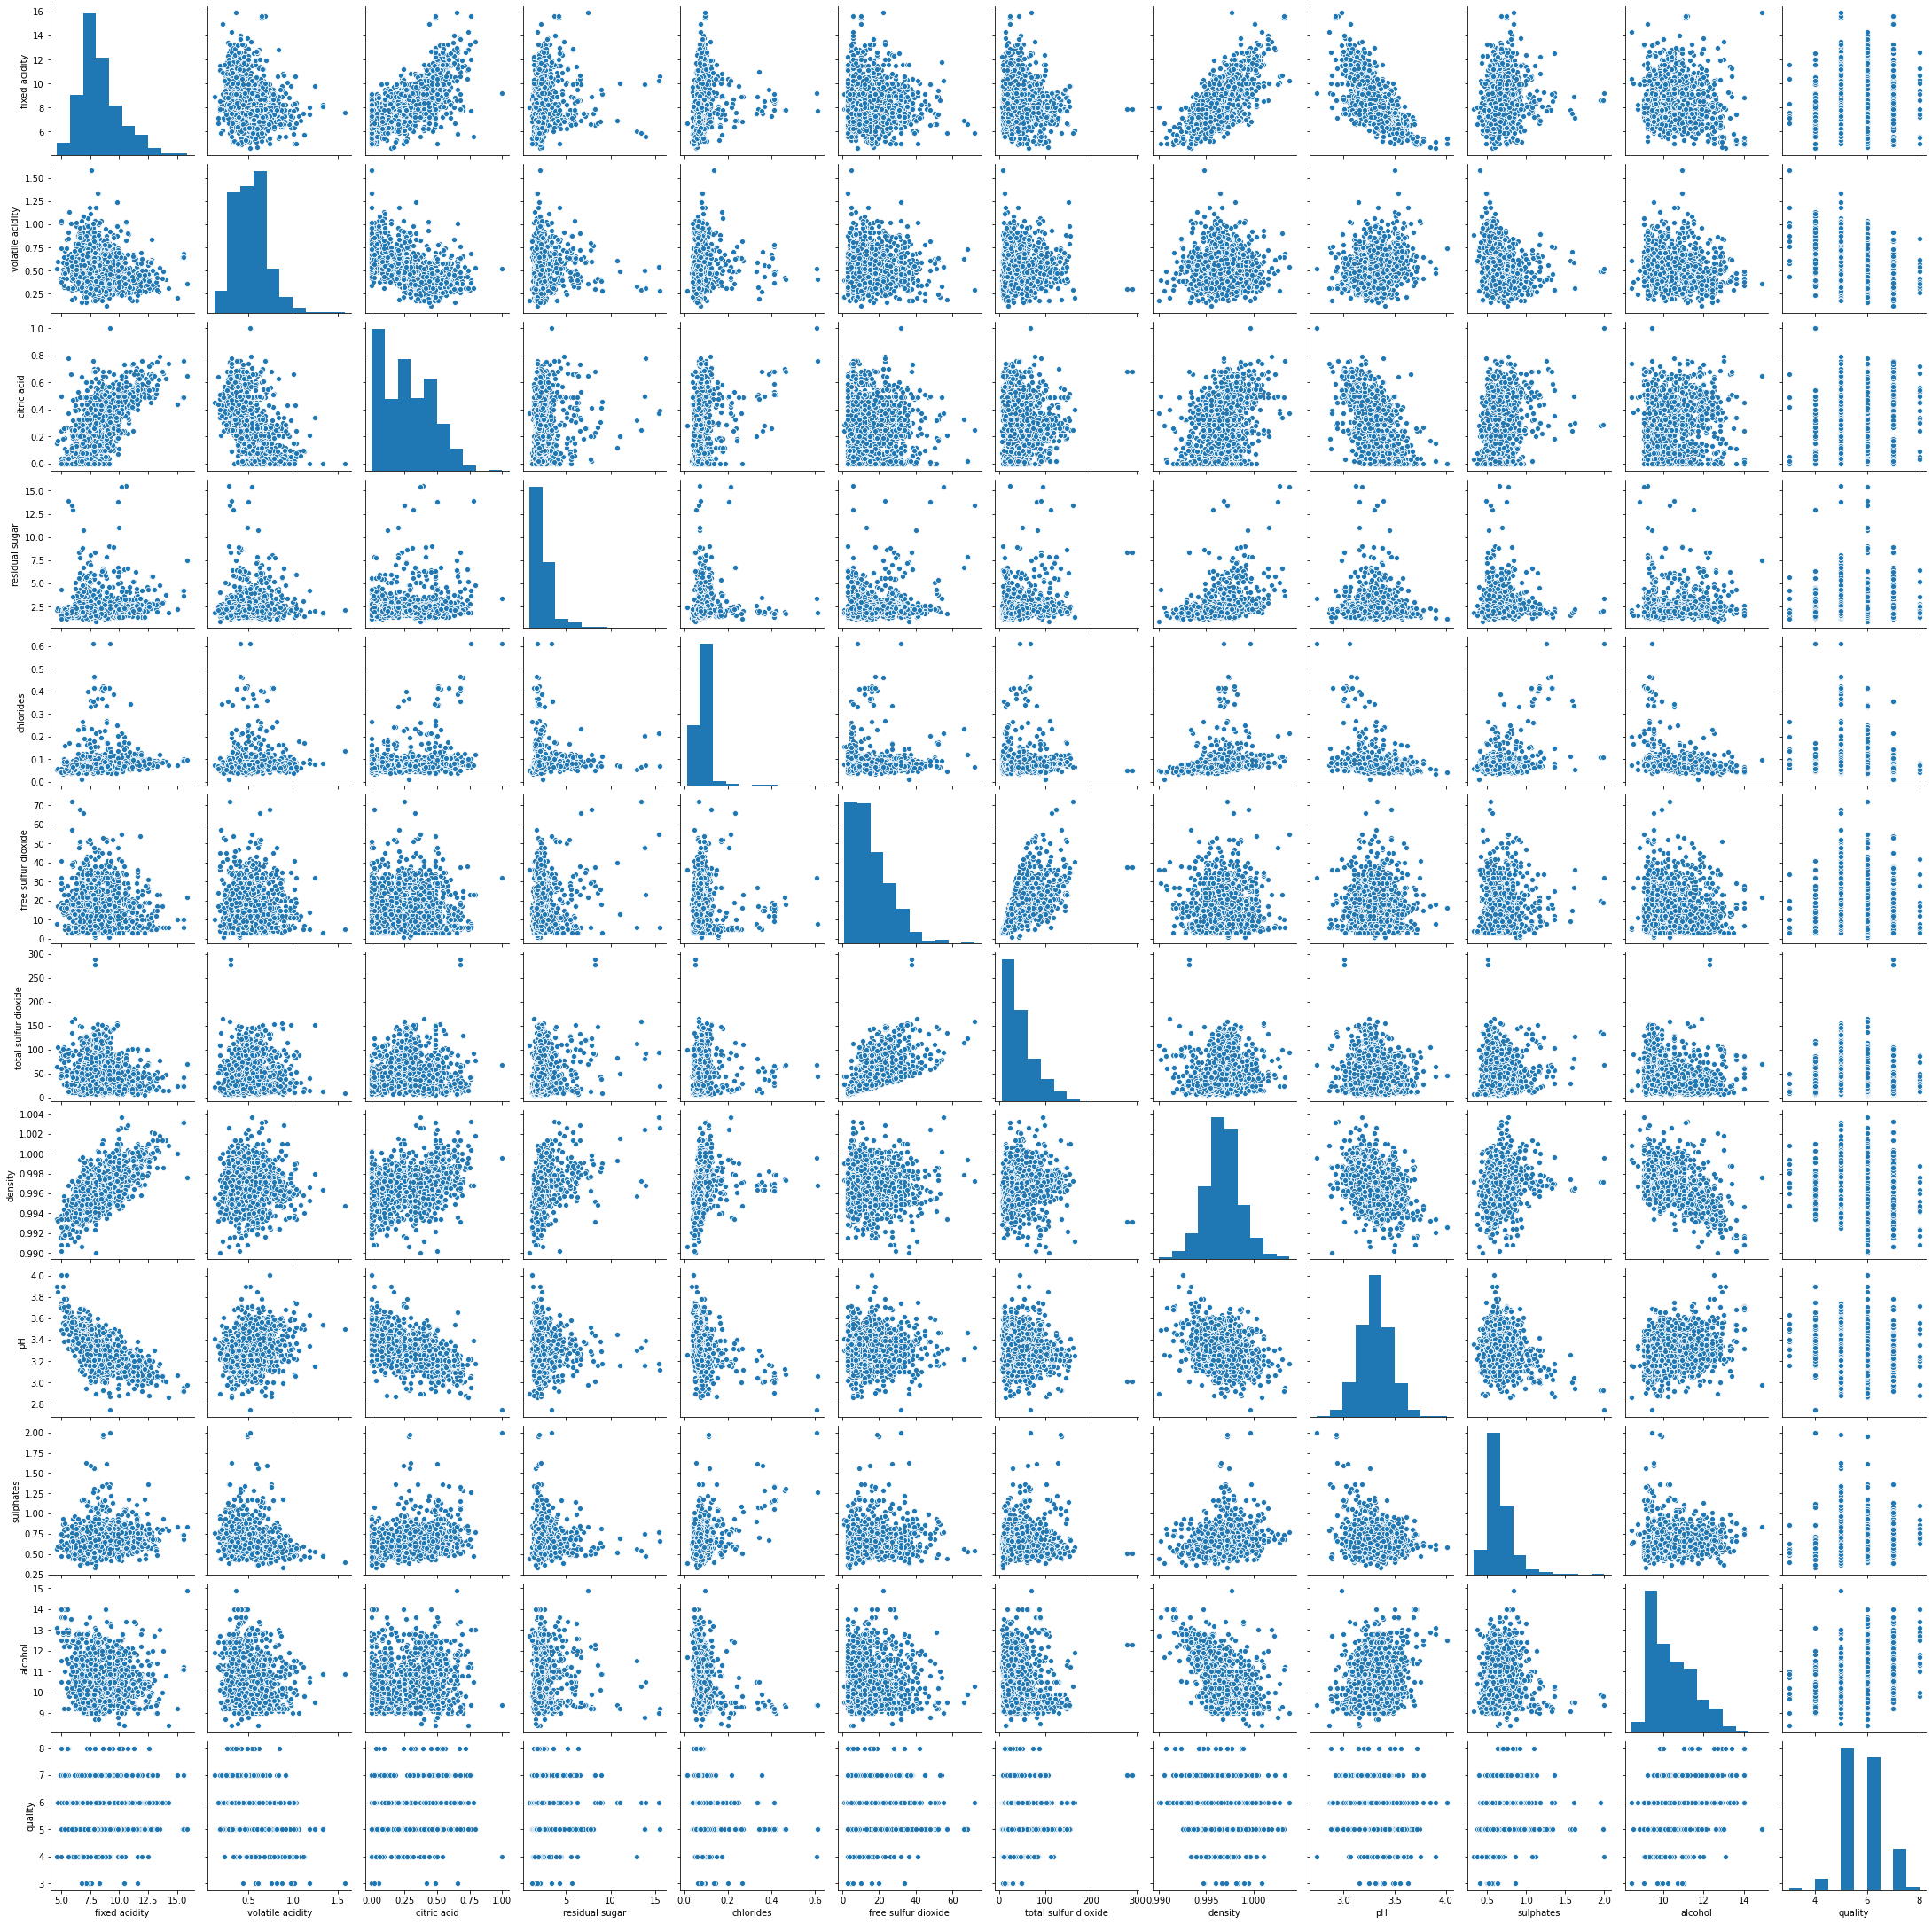

In [95]:
# Red wine
sb.pairplot(df_rw)